A matching is a subset of edges where every node in one group goes through only 1 node in the other group. There should be only one edge from each node.  
Types of matching:  
1. Stable matching (unweighted bipartite graph)


Let us take a simple example of stable mapping between students and rooms. Its an unweighted graph where students 
We want to map students and rooms. We want to identify  a subset where we match one student to exactly one other room. The students give what rooms are acceptable, and many solutions are possible.

In [7]:
# Import networkx library and rename it as nx. 
import networkx as nx

# Other packages required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
edgelist_df = pd.DataFrame({'node1':['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'], 'node2':[1,2,2,3,3,4,4,1]})
edgelist_df

,node1,node2
0,A,1
1,A,2
2,B,2
3,B,3
4,C,3
5,C,4
6,D,4
7,D,1


In [3]:
g = nx.Graph()
for i, elrow in edgelist_df.iterrows():
    g.add_edge(elrow[0], elrow[1])
g.edges(data=True)

EdgeDataView([('A', 1, {}), ('A', 2, {}), (1, 'D', {}), (2, 'B', {}), ('B', 3, {}), (3, 'C', {}), ('C', 4, {}), (4, 'D', {})])

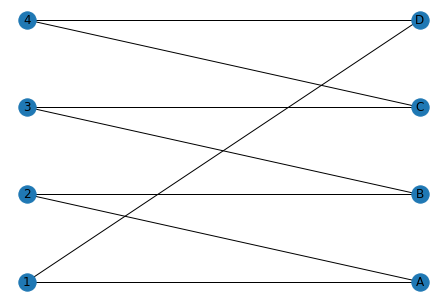

In [4]:
# Make two sets in bipartite and get positions for the same
right, left = nx.bipartite.sets(g)

pos = {}
# Update position for node from each group
for i, node in enumerate(sorted(list(left))):
    g.add_node(node,pos=(0,i))
for i, node in enumerate(sorted(list(right))):
    g.add_node(node,pos=(1,i))

nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True)

## Halls augumenting theorem
Select any random matching, and move along the augumented paths.

In [5]:
# Select random edges
selected_edges = []
for left_node in left:
    # Selet first node that is selected as the initial selection
    selected_edges.append(list(g.edges(left_node))[0])
selected_edges

[(1, 'A'), (2, 'A'), (3, 'B'), (4, 'C')]

Selected edges are shown in green

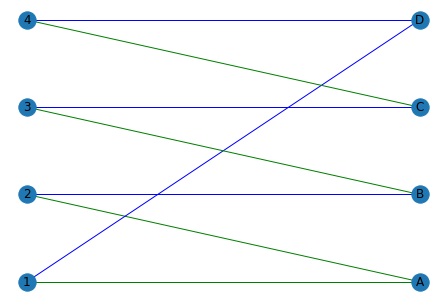

In [6]:
for edge in g.edges:
    if edge in selected_edges or (edge[1], edge[0]) in selected_edges:
        g.add_edge(edge[0],edge[1],color='g',weight=10)
    else:
        g.add_edge(edge[0],edge[1],color='b',weight=0.1)
nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True, 
        edge_color=nx.get_edge_attributes(g,'color').values())

We can see that this is not matching as node 1 and 2 are mapped to A. This can be resolved by 

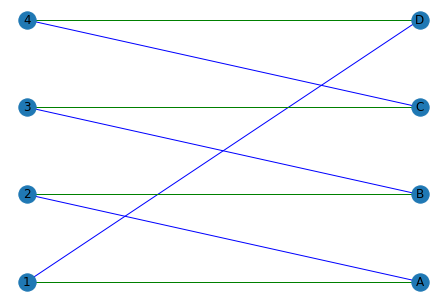

In [13]:
selected_edges = {(1,'A'), (2,'B'), (3, 'C'), (4,'D')}
for edge in g.edges:
    if edge in selected_edges or (edge[1], edge[0]) in selected_edges:
        g.add_edge(edge[0],edge[1],color='g',weight=10)
    else:
        g.add_edge(edge[0],edge[1],color='b',weight=0.1)
nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True, 
        edge_color=nx.get_edge_attributes(g,'color').values())

In [9]:
nx.algorithms.bipartite.matching.hopcroft_karp_matching(g, top_nodes = list(set(edgelist_df.node1)))

{3: 'C', 2: 'B', 1: 'A', 4: 'D', 'C': 3, 'B': 2, 'A': 1, 'D': 4}

## Weighted bipartite mapping
The weight can be a quality index or valuations etc. Consider the suppliers-buyers example as shown below:

In [39]:
sellers = ['A', 'B', 'C']
buyers = ['x', 'y', 'z']
valuations_for_buyers = [[3,6,4], [2,8,1], [1,2,3]]
sellers_price = [0,0,0]

In [29]:
import matplotlib.pyplot as plt

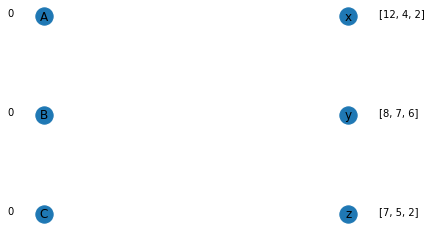

In [30]:
g = nx.Graph()
pos = {}
# Update position for node from each group
for i, node in enumerate(sellers):
    g.add_node(node,pos=(0,len(sellers)-i))
for i, node in enumerate(buyers):
    g.add_node(node,pos=(1,len(buyers)-i))
    
# Plot text for the buyers
for i, buyer in enumerate(buyers):
    plt.text(1.1,len(buyers)-i,s=valuations_for_buyers[i], horizontalalignment='left')

# Plot text for the sellers
for i, buyer in enumerate(buyers):
    plt.text(-0.1,len(buyers)-i,s=sellers_price[i], horizontalalignment='right')

nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True)

In [31]:
def match_to_maximum_utility(sellers, buyers, valuation, price):
    max_utility_sellers = {}
    for buyer_index in range(len(buyers)):
        max_utility = 0
        for seller_index in range(len(sellers)):
            if(max_utility < valuation[buyer_index][seller_index] - price[seller_index]):
                max_utility = valuation[buyer_index][seller_index]- price[seller_index]
                max_utility_sellers[buyers[buyer_index]] = [sellers[seller_index]]
            elif(max_utility == valuation[buyer_index][seller_index] - price[seller_index]):
                max_utility_sellers[buyers[buyer_index]].append(sellers[seller_index])
    return max_utility_sellers

In [32]:
max_util = match_to_maximum_utility(sellers, buyers, valuations_for_buyers, sellers_price)
max_util

{'x': ['A'], 'y': ['A'], 'z': ['A']}

In [33]:
def plot_max_utility_graph(sellers, buyers, valuations_for_buyers, sellers_price, max_util):
    g = nx.Graph()
    pos = {}
    # Update position for node from each group
    for i, node in enumerate(sellers):
        g.add_node(node,pos=(0,len(sellers)-i))
    for i, node in enumerate(buyers):
        g.add_node(node,pos=(1,len(buyers)-i))
        
    # Make edges
    for key, values in max_util.items():
        for value in values:
            g.add_edge(key,value)

    # Plot text for the buyers
    for i, buyer in enumerate(buyers):
        plt.text(1.1,len(buyers)-i,s=valuations_for_buyers[i], horizontalalignment='left')

    # Plot text for the sellers
    for i, buyer in enumerate(buyers):
        plt.text(-0.1,len(buyers)-i,s=sellers_price[i], horizontalalignment='right')

    nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True)
    plt.show()

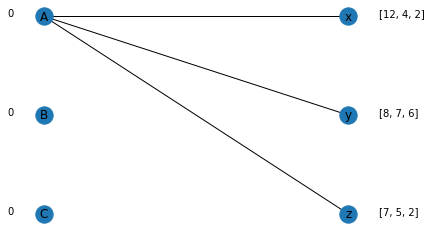

In [34]:
plot_max_utility_graph(sellers, buyers, valuations_for_buyers, sellers_price, max_util)

In [35]:
def get_overdetermined_edge_and_increase_price(sellers, sellers_price, max_util):
    from collections import Counter
    counts = dict(Counter(sum(max_util.values(), [])))
    over_determined_list = []
    for key, value in counts.items():
        if(value>1):
            over_determined_list.append(key)
            sellers_price[sellers.index(key)] += 1
    print('Nodes', over_determined_list, 'are over determined. Added 1 to the price for the suppliers')
    return counts

In [36]:
get_overdetermined_edge_and_increase_price(sellers, sellers_price, max_util)

Nodes ['A'] are over determined. Added 1 to the price for the suppliers


{'A': 3}

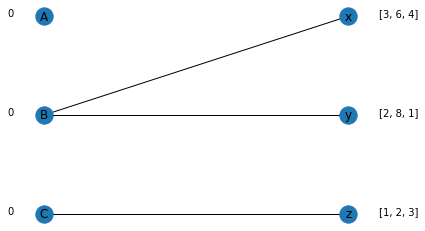

Nodes ['B'] are over determined. Added 1 to the price for the suppliers


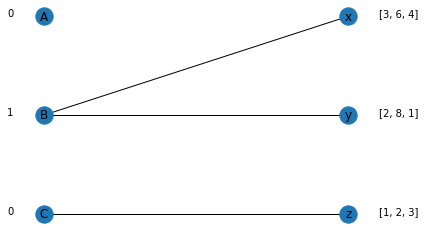

Nodes ['B'] are over determined. Added 1 to the price for the suppliers


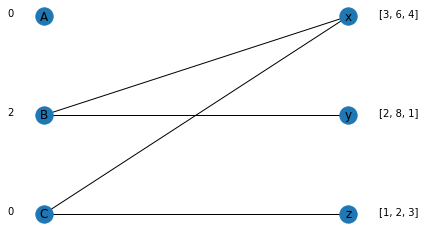

Nodes ['B', 'C'] are over determined. Added 1 to the price for the suppliers


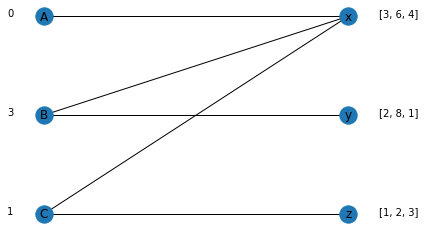

Nodes ['B', 'C'] are over determined. Added 1 to the price for the suppliers


In [40]:
no_of_sellers_selected = 0
while(no_of_sellers_selected != len(sellers)):
    max_util = match_to_maximum_utility(sellers, buyers, valuations_for_buyers, sellers_price)
    plot_max_utility_graph(sellers, buyers, valuations_for_buyers, sellers_price, max_util)
    counts = get_overdetermined_edge_and_increase_price(sellers, sellers_price, max_util)
    no_of_sellers_selected = len(counts) # need not always be the case, check
    

## Matching with preferences
Stable matching: Stability is an eqvilibrium when no pair on ether side has an incentive to devaite from the mapping.  
### Gale Shapley Algorithm
n players on both sides with males on one side and women on another side.  
1. Every unmatched m proposses to their first preference available.
2. If w is unmatched, w accepts. If already matched and the m has higher preference for w, w switches. Else, previous mapping remains

In [108]:
males = ['m1', 'm2', 'm3']
females = ['w1', 'w2', 'w3']

male_preferences = [['w1', 'w2', 'w3'], ['w2', 'w3', 'w1'], ['w2', 'w3', 'w1']]
female_preferences = [['m2', 'm3', 'm1'], ['m3', 'm1', 'm2'], ['m1', 'm2', 'm3']]

In [109]:
def match_next_male(male_index, males, females, male_preferences, female_preferences):
    for female in male_preferences[male_index]:
        if(female not in current_mapping.values()):
            current_mapping[males[male_index]] = female
            return current_mapping
        elif(female in current_mapping.values()):
            current_mapping_inverse = dict(zip(current_mapping.values(),current_mapping.keys()))
            current_male_for_the_female = current_mapping_inverse[female]
            if(female_preferences[males.index(current_male_for_the_female)] > female_preferences[male_index]):
                current_mapping[males[male_index]] = female
                current_mapping.pop(current_male_for_the_female)
                return current_mapping

In [110]:
def plot_max_utility_graph(males, females, male_preferences, female_preferences, current_mapping):
    g = nx.Graph()
    pos = {}
    # Update position for node from each group
    for i, node in enumerate(males):
        g.add_node(node,pos=(0,len(males)-i))
    for i, node in enumerate(females):
        g.add_node(node,pos=(1,len(females)-i))
        
    # Make edges
    for key, value in current_mapping.items():
        g.add_edge(key,value)

    # Plot text for the males
    for i, male in enumerate(males):
        plt.text(-0.1,len(males)-i,s=male_preferences[i], horizontalalignment='right')

    # Plot text for the females
    for i, female in enumerate(females):
        plt.text(1.1,len(females)-i,s=female_preferences[i], horizontalalignment='left')

    nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True)
    plt.show()
    print('_____________________________________________________________________________')

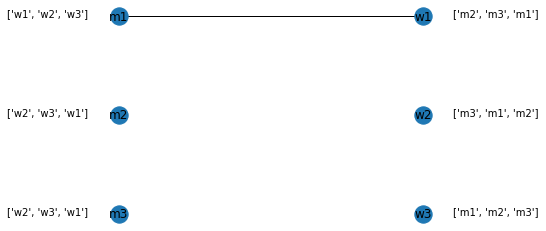

_____________________________________________________________________________


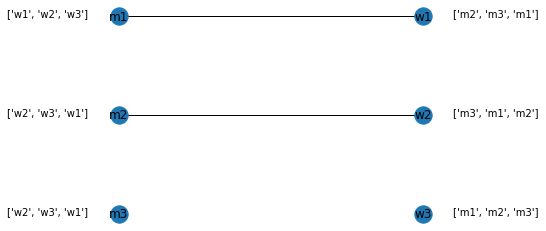

_____________________________________________________________________________


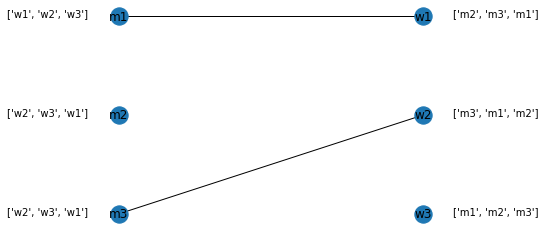

_____________________________________________________________________________


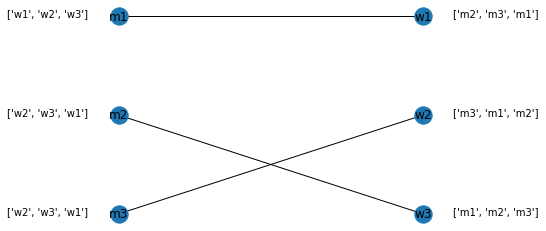

_____________________________________________________________________________


In [112]:
current_mapping = {}
while(len(current_mapping) != len(males)):
    for male_index in range(len(males)):
        if(current_mapping.get(males[male_index]) is None):
            current_mapping = match_next_male(male_index, males, females, male_preferences, female_preferences)
            plot_max_utility_graph(males, females, male_preferences, female_preferences, current_mapping)